In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import mnist
from collections import Counter

import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
# Get tensorflow version
print(tf.__version__)

1.15.0


In [8]:
# Create regression dataset: parabolic curve
X = np.linspace(-3, 3, 100).reshape(-1,1)
y = X[:,0] ** 2
print(X.shape)
print(y.shape)

(100, 1)
(100,)


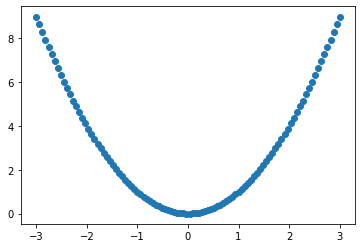

In [9]:
# Plot curve
plt.scatter(X,y)
plt.show()

In [0]:
# Split, train and test
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=2020)

In [0]:
# Create model with 1 hidden layer, 128 neurons
model = Sequential()
model.add(Dense(128, activation='relu'))

In [0]:
# Add final hidden layer with output prediction
model.add(Dense(1))

In [0]:
# Compile model before training -- add optimizer, loss function, metrics
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse']
)

In [26]:
% time
# Start training
history = model.fit(
    x=y_train,
    y=y_train,
    verbose=0,
    validation_data=(x_test, y_test),
    batch_size=100,
    epochs=10000
)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  256       
_________________________________________________________________
dense_1 (Dense)              multiple                  129       
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Save model layers into figure
tf.keras.utils.plot_model(model, 'regression.png')
ypred = model.predict(X)

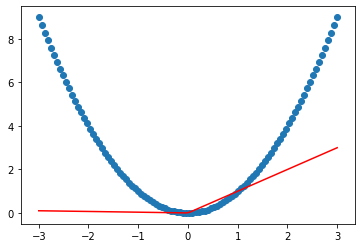

In [28]:
plt.plot(X, ypred,'r')
plt.scatter(X,y)
plt.show()

In [0]:
# Linear Regression
from sklearn import datasets
x2, y2 = datasets.make_regression(n_samples=100,
                                  n_features=1,
                                  n_informative=1,
                                  noise=1.0,
                                  random_state=2020
                                  )

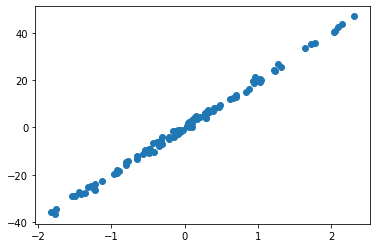

In [33]:
plt.scatter(x2[:,0], y2)

**Convolution Neural Network**

In [34]:
# Image Classification
# Load data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [35]:
print(x_train.shape)

(60000, 28, 28)


In [36]:
print(y_train.shape)

(60000,)


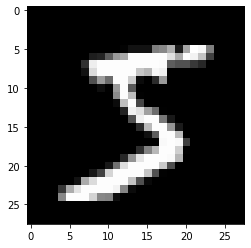

In [37]:
# Show image
plt.imshow(x_train[0], cmap='gray')

In [0]:
import collections

In [39]:
# Distributon of the labels in our training dataset
label_counts = collections.Counter(y_train)
label_counts

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [0]:
# Image Dimensions --4:
# [batch_size, image_height, image_weight, image_depth]